In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
!rm -r ~/.kaggle


rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
!mkdir ~/.kaggle


In [ ]:
!mv ./kaggle.json ~/.kaggle/


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d rivaldo1233/reallife-trash-dataset

... resuming from 93323264 bytes (15734102105 bytes left) ...
  1% 89.0M/14.7G [00:00<?, ?B/s]
User cancelled operation


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/DATASET.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()



In [ ]:
import os
import random
import shutil
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import regularizers
from shutil import copyfile
import matplotlib.pyplot as plt

In [ ]:
source_TrainO = '/content/drive/MyDrive/Capstone/DATABASE/DATASET/TRAIN/O'
source_TrainR = '/content/drive/MyDrive/Capstone/DATABASE/DATASET/TRAIN/R'
source_TestO = '/content/drive/MyDrive/Capstone/DATABASE/DATASET/TEST/O'
source_TestR = '/content/drive/MyDrive/Capstone/DATABASE/DATASET/TEST/R'

dest_Train_Organic = '/content/Dataset/TRAIN/Organic'
dest_Train_Unorganic ='/content/Dataset/TRAIN/Unorganic'

dest_Validation_Organic ='/content/Dataset/VALIDATION/Organic'
dest_Validation_Unorganic ='/content/Dataset/VALIDATION/Unorganic'

dest_Test_Organic ='/content/Dataset/TEST/Organic'
dest_Test_Unorganic ='/content/Dataset/TEST/Unorganic'


files_TrainO = os.listdir(source_TrainO)
files_TrainR = os.listdir(source_TrainR)
files_TestO  = os.listdir(source_TestO)
files_TestR  = os.listdir(source_TestR)

no_of_files_Train = 1500
no_of_files_Test_Validation = 200

for file_name in random.sample(files_TrainO, no_of_files_Train):
    shutil.copy(os.path.join(source_TrainO, file_name), dest_Train_Organic)

for file_name in random.sample(files_TrainR, no_of_files_Train):
    shutil.copy(os.path.join(source_TrainR, file_name), dest_Train_Unorganic)

for file_name in random.sample(files_TestO, no_of_files_Test_Validation):
    shutil.copy(os.path.join(source_TrainO, file_name), dest_Validation_Organic)
    shutil.copy(os.path.join(source_TestO, file_name), dest_Test_Organic)

for file_name in random.sample(files_TestR, no_of_files_Test_Validation):
    shutil.copy(os.path.join(source_TrainR, file_name), dest_Validation_Unorganic)
    shutil.copy(os.path.join(source_TestR, file_name), dest_Test_Unorganic)

    #shutil.copy(os.path.join(source, file_name), dest)

FileNotFoundError: ignored

In [ ]:
source_TrainO = '/content/drive/MyDrive/Capstone/DATABASE/DATASET/TRAIN/O'
source_TrainR = '/content/drive/MyDrive/Capstone/DATABASE/DATASET/TRAIN/R'
source_TestO = '/content/drive/MyDrive/Capstone/DATABASE/DATASET/TEST/O'
source_TestR = '/content/drive/MyDrive/Capstone/DATABASE/DATASET/TEST/R'

dest_Train_Organic = '/content/Dataset/TRAIN/Organic'
dest_Train_Unorganic ='/content/Dataset/TRAIN/Unorganic'

dest_Validation_Organic ='/content/Dataset/VALIDATION/Organic'
dest_Validation_Unorganic ='/content/Dataset/VALIDATION/Unorganic'

dest_Test_Organic ='/content/Dataset/TEST/Organic'
dest_Test_Unorganic ='/content/Dataset/TEST/Unorganic'


files_TrainO = os.listdir(source_TrainO)
files_TrainR = os.listdir(source_TrainR)
files_TestO  = os.listdir(source_TestO)
files_TestR  = os.listdir(source_TestR)

no_of_files_Train = 1500
no_of_files_Test_Validation = 200

for file_name in random.sample(files_TestO, no_of_files_Test_Validation):
    shutil.copy(os.path.join(source_TestO, file_name), dest_Test_Organic)

for file_name in random.sample(files_TrainO, no_of_files_Test_Validation):
    shutil.copy(os.path.join(source_TrainO, file_name), dest_Validation_Organic)

for file_name in random.sample(files_TestR, no_of_files_Test_Validation):
    shutil.copy(os.path.join(source_TestR, file_name), dest_Test_Unorganic)

for file_name in random.sample(files_TrainR, no_of_files_Test_Validation):
    shutil.copy(os.path.join(source_TrainR, file_name), dest_Validation_Unorganic)


In [ ]:
source_TestO = '/content/Dataset/VALIDATION/Organic/'
source_TestR = '/content/Dataset/VALIDATION/Unorganic/'
files_TestO  = os.listdir(source_TestO)
files_TestR  = os.listdir(source_TestR)

for file in files_TestO:
    file_path = os.path.join(source_TestO,file)
    os.remove(file_path)
for file in files_TestR:
    file_path = os.path.join(source_TestR,file)
    os.remove(file_path)

IsADirectoryError: ignored

In [ ]:
#make the folder containing TRAIN, VALIDATION, TEST with subfolder
#Organic and Unorganic

source_path = '/content/Dataset'


source_path_Test = os.path.join(source_path, 'TEST')
source_path_Validation = os.path.join(source_path, 'VALIDATION')
source_path_Train = os.path.join(source_path, 'TRAIN')


In [ ]:
def train_val_generators(source_path_Train, source_path_Test):
 ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=source_path_Train,
                                                      batch_size=10,
                                                       class_mode='categorical',
                                                      target_size=(32, 32))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator( rescale = 1.0/255.)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=source_path_Test,
                                                                batch_size=5,
                                                                class_mode='categorical',
                                                                target_size=(32, 32))
#   ### END CODE HERE
  return train_generator, validation_generator

train_generator, validation_generator = train_val_generators(source_path_Train, source_path_Test)


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
image_width, image_height = 255 , 255
batch_size_train = 20
batch_size_validation = 5
train_shuffle = tf.keras.preprocessing.image_dataset_from_directory(
    source_path_Train,
    shuffle = True,
    image_size = (image_width,image_height),
    batch_size = batch_size_train
)
validation_shuffle = tf.keras.preprocessing.image_dataset_from_directory(
    source_path_Validation,
    shuffle = True,
    image_size = (image_width,image_height),
    batch_size = batch_size_validation
)
test_shuffle = tf.keras.preprocessing.image_dataset_from_directory(
    source_path_Test,
    shuffle = True,
    image_size = (image_width,image_height),
    batch_size = batch_size_validation
)



Found 3000 files belonging to 2 classes.
Found 400 files belonging to 2 classes.
Found 400 files belonging to 2 classes.


In [ ]:
class_names_train = train_shuffle.class_names
class_names_validation = validation_shuffle.class_names
class_names_test = test_shuffle.class_names

class_names_train
class_names_validation
class_names_test

['Organic', 'Unorganic']

images_train.shape:  (20, 255, 255, 3)
labels_train.shape:  (20,)


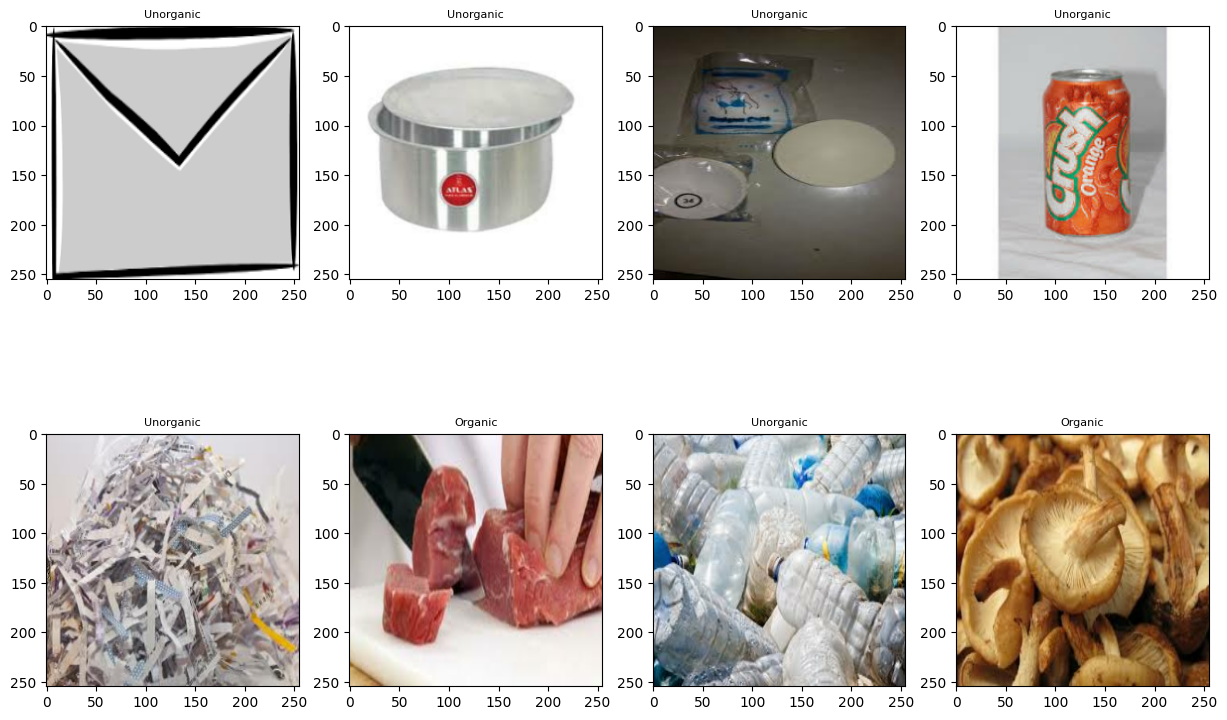

In [ ]:
plt.figure(figsize = (15,15))
for images_train, labels_train in train_shuffle.take(1):
  print('images_train.shape: ', images_train.shape)
  print('labels_train.shape: ', labels_train.shape)
  for i in range(8):
     ax = plt.subplot(3,4,i+1)
     plt.imshow(images_train[i].numpy().astype("int"))
     plt.title(class_names_train[labels_train[i]],fontsize = 8)


In [ ]:
train_dataset = train_shuffle.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_shuffle.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
test_set = test_shuffle.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
augment = tf.keras.Sequential([
                     tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                     tf.keras.layers.experimental.preprocessing.RandomRotation(0.4),
                     tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
])


In [ ]:
train_dataset = train_dataset.map(
    lambda x, y: (augment(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

# Define preprocessing functions
def preprocess_images(images, labels):
    # Normalize pixel values to be between 0 and 1
    images = images / 255.0
    return images, labels

def preprocess_labels(images, labels):
    # One-hot encode labels
    labels_one_hot = tf.one_hot(labels, depth=len(class_names_train))
    return images, labels_one_hot

# Apply preprocessing to the datasets
train_dataset = train_dataset.map(preprocess_images).map(preprocess_labels)
validation_dataset = validation_dataset.map(preprocess_images).map(preprocess_labels)
test_dataset = test_set.map(preprocess_images).map(preprocess_labels)


In [ ]:
input_shape_transfer = (image_width,image_height,3)
transfer_model = tf.keras.applications.InceptionV3(
    weights="imagenet",
    include_top=False,
    input_shape=input_shape_transfer,
)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            val_acc = logs["val_accuracy"]
            if val_acc > 0.95:
                print("\nReached 95% accuracy so cancelling training!")

                # Stop training once the above condition is met
                self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [ ]:
num_classes = len(class_names_train)

model = tf.keras.models.Sequential([
  transfer_model,
  tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(num_classes, activation='softmax'),
])
model.build(input_shape = (batch_size_train,image_width,image_height,3))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 conv2d_95 (Conv2D)          (None, 4, 4, 64)          1179712   
                                                                 
 dropout_1 (Dropout)         (None, 4, 4, 64)          0         
                                                                 
 global_average_pooling2d_1  (None, 64)                0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 22982626 (87.67 MB)
Trainable params: 22948194 (87.54 MB)
Non-trainable params: 34432 (134.50 KB)
________

In [ ]:

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
for images, labels in train_dataset.take(1):
    print('Shape of labels before one-hot encoding:', labels.shape)

Shape of labels before one-hot encoding: (20, 2)


In [ ]:
history = model.fit(train_dataset,
                    epochs=100,
                    verbose=1,
                    validation_data=validation_dataset,
                    callbacks=[callbacks]
                    )

Epoch 1/100
150/150 [==============================] - 62s 413ms/step - loss: 0.3817 - accuracy: 0.8340 - val_loss: 0.7180 - val_accuracy: 0.6125
Epoch 2/100
150/150 [==============================] - 62s 415ms/step - loss: 0.3865 - accuracy: 0.8347 - val_loss: 0.3731 - val_accuracy: 0.8450
Epoch 3/100
150/150 [==============================] - 63s 419ms/step - loss: 0.3879 - accuracy: 0.8360 - val_loss: 0.4427 - val_accuracy: 0.8050
Epoch 4/100
150/150 [==============================] - 61s 404ms/step - loss: 0.3902 - accuracy: 0.8337 - val_loss: 0.4665 - val_accuracy: 0.7725
Epoch 5/100
150/150 [==============================] - 62s 412ms/step - loss: 0.3966 - accuracy: 0.8347 - val_loss: 0.3703 - val_accuracy: 0.8650
Epoch 6/100
150/150 [==============================] - 62s 413ms/step - loss: 0.3779 - accuracy: 0.8387 - val_loss: 0.4819 - val_accuracy: 0.8325
Epoch 7/100
150/150 [==============================] - 62s 412ms/step - loss: 0.3927 - accuracy: 0.8370 - val_loss: 0.4634 -

In [ ]:
model_evaluation = model.evaluate(test_dataset)

80/80 [==============================] - 3s 29ms/step - loss: 0.3553 - accuracy: 0.8475


Saving glas_3.jpg to glas_3.jpg
1/1 [==============================] - 0s 34ms/step


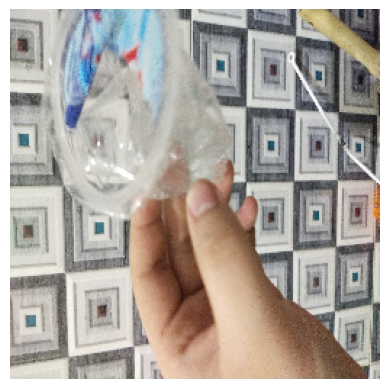

File: glas_3.jpg
['Organic', 'Unorganic']
Predictions: [[0.00145282 0.99854714]]


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image


def preprocess_image(path_image):
    image = tf.keras.preprocessing.image.load_img(path_image, target_size=(255, 255))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_array = image_array / 255.0  # Normalize pixel values
    return np.expand_dims(image_array, axis=0)  # Add batch dimension
uploaded = files.upload()

for fn in uploaded.keys():

  process_image = preprocess_image(fn)

  predictions = model.predict(process_image, batch_size=10)
  img = image.load_img(fn, target_size=(255, 255))
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  print(f"File: {fn}")
  print(class_names_train)
  print("Predictions:", predictions)







In [ ]:
model.save('/content/trashClassification_sigmoid.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import zipfile
with zipfile.ZipFile('/content/trashClassification_sigmoid.zip', 'w') as zipf:
    zipf.write('/content/trashClassification_sigmoid.h5', 'trashClassification_sigmoid.h5')

In [ ]:
from google.colab import files

# Download the zip file
files.download('/content/trashClassification_sigmoid.zip')